In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading ratings file

In [2]:
ratings_headers = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=ratings_headers)
ratings.head()

C:\Users\Aman Sharif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## Loading users file

In [3]:
users_headers = ['user_id','gender','age','occupation','zip-code']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=users_headers)
users.head()

C:\Users\Aman Sharif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Loading movies file

In [4]:
movies_headers = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat',sep='::', header=None, names=movies_headers)
movies.head()

C:\Users\Aman Sharif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Joining three dataframes

In [5]:
df = users.join(ratings.set_index('user_id'), on=['user_id']).join(movies.set_index('movie_id'), on=['movie_id'])

In [6]:
df.head()

,user_id,gender,age,occupation,zip-code,movie_id,ratings,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
0,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
0,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
0,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
0,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [7]:
df.shape

(1000209, 10)

## Creating spreadsheet-style pivot table as a DataFrame

In [8]:
rp = df.pivot_table(columns=['movie_id'],index=['user_id'],values='ratings')
rp.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
rp.tail()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6040,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rp.shape

(6040, 3706)

## Filling NaN with 0

In [11]:
rp = rp.fillna(0); # Replace NaN
rp.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Extracting values from rp dataframe

In [12]:
r = rp.values

In [13]:
R = np.asmatrix(r)
R

matrix([[5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [3., 0., 0., ..., 0., 0., 0.]])

In [14]:
R.shape

(6040, 3706)

## Initialization of parameters

In [15]:
lambda_p = 0.1
lambda_q = 0.1
f = 100
U, I = R.shape
max_training_round = 20

t = 1            #Training Epoch

## Initialization of Factor matrices

In [16]:
p = 5 * np.random.rand(U, f) 
q = 5 * np.random.rand(f, I)

In [17]:
P = np.asmatrix(p)
Q = np.asmatrix(q)

In [18]:
P

matrix([[1.32669816, 2.15733512, 4.22489242, ..., 2.86199696, 3.9496379 ,
         0.76311139],
        [3.78808824, 2.8674695 , 2.67242092, ..., 4.58771151, 2.66560289,
         2.51683236],
        [2.30920035, 2.31980716, 3.82209771, ..., 3.87119193, 0.1203963 ,
         2.24059126],
        ...,
        [0.50679877, 3.49281426, 4.40260623, ..., 3.72922823, 4.50933687,
         1.32512072],
        [2.26319962, 4.7966294 , 4.60343997, ..., 1.18271106, 1.96100533,
         4.56273527],
        [0.09626228, 2.48794385, 1.43650511, ..., 4.71794274, 0.62865997,
         3.96563537]])

In [19]:
Q

matrix([[2.88972554, 3.99031   , 2.00686291, ..., 0.86256032, 0.52806533,
         4.61415958],
        [1.21099218, 3.89952411, 0.75376672, ..., 3.780225  , 3.4106275 ,
         3.43483437],
        [0.27109345, 4.69098372, 1.21964291, ..., 3.36529976, 0.08325299,
         2.34128491],
        ...,
        [1.31240838, 4.24174721, 4.80133005, ..., 3.8368064 , 4.52157916,
         3.66066186],
        [1.521531  , 2.17473108, 2.57697319, ..., 2.70402347, 2.50691272,
         4.14286617],
        [2.85309122, 1.11094758, 2.20695549, ..., 0.74121035, 3.75801508,
         0.64674265]])

## Simple error measure (Sum of elementwise squared error)

In [20]:
def get_error(R, P, Q):
    return np.sum(np.square(R - np.dot(P,Q)))

## Auxiliary matrix to determine Ui and Iu

In [21]:
W = R>0.01
W[W == True] = 1
W[W == False] = 0
# To be consistent with our Q matrix
W = W.astype(np.int64, copy=False)

## Counting no of users who rated item i

In [22]:
Ui = []
for iterator in range(I):
    Ui.append(W[:,iterator].sum())

## Counting no of items which was being rated by user u

In [23]:
Iu = []
for iterator in range(U):
    Iu.append(W[iterator].sum())

In [24]:
len(Ui)

3706

In [25]:
len(Iu)

6040

## RSNMF

In [26]:
error = []
while t <= max_training_round:
    UserUp = np.zeros((U,f), dtype=float)
    UserDown = np.zeros((U,f), dtype=float)
    ItemUp = np.zeros((f,I), dtype=float)
    ItemDown = np.zeros((f,I), dtype=float)
    for u in range(U):
        for i in range(I):
            if(R[u,i] != 0):
                rui_cap = P[u,:]*Q[:,i]
                for k in range(f):
                    UserUp[u,k] = UserUp[u,k] + Q[k,i] * R[u,i]
                    UserDown[u,k] = UserDown[u,k] + Q[k,i] * rui_cap
                    ItemUp[k,i] = ItemUp[k,i] + P[u,k] * R[u,i]
                    ItemDown[k,i] = ItemDown[k,i] + P[u,k]*rui_cap
    for u in range(U):
        for k in range(f):
            UserDown[u,k] = UserDown[u,k] + Iu[u] * lambda_p * P[u,k]
            P[u,k] = P[u,k] * (UserUp[u,k]/UserDown[u,k])
    for i in range(I):
        for k in range(f):
            ItemDown[k,i] = ItemDown[k,i] + Ui[i] * lambda_q * Q[k,i]
            Q[k,i] = Q[k,i] * (ItemUp[k,i]/ItemDown[k,i])
    error.append(get_error(R, P, Q))
    print('{}th epoch is completed'.format(t))
    t = t+1

1th epoch is completed
2th epoch is completed
3th epoch is completed
4th epoch is completed
5th epoch is completed
6th epoch is completed
7th epoch is completed
8th epoch is completed
9th epoch is completed
10th epoch is completed
11th epoch is completed
12th epoch is completed
13th epoch is completed
14th epoch is completed
15th epoch is completed
16th epoch is completed
17th epoch is completed
18th epoch is completed
19th epoch is completed
20th epoch is completed


In [27]:
print('Total error of rated movies: {}'.format(get_error(R,P,Q)))

Total error of rated movies: 569551283.3613634


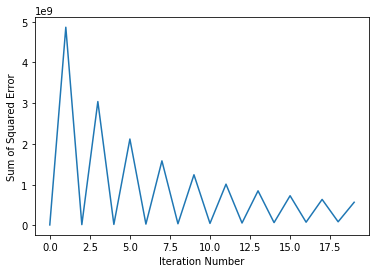

In [28]:
plt.plot(error);
plt.xlabel('Iteration Number');
plt.ylabel('Sum of Squared Error');

In [29]:
def print_recommendations(Q_hat,W=W, Q=Q, movie_titles=movie_titles):
    #Q_hat -= np.min(Q_hat)
    #Q_hat[Q_hat < 1] *= 5
    Q_hat -= np.min(Q_hat)
    Q_hat *= float(5) / np.max(Q_hat)
    movie_ids = np.argmax(Q_hat - 5 * W, axis=1)
    for jj, movie_id in zip(range(m), movie_ids):
        #if Q_hat[jj, movie_id] < 0.1: continue
        print('User {} liked {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq > 3])))
        print('User {} did not like {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq < 3 and qq != 0])))
        print('\n User {} recommended movie is {} - with predicted rating: {}'.format(
                    jj + 1, movie_titles[movie_id], Q_hat[jj, movie_id]))
        print('\n' + 100 *  '-' + '\n')
#print_recommendations()

NameError: name 'movie_titles' is not defined

In [ ]:
R_estimate = np.dot(P,Q)

In [ ]:
print_recommendations(R_estimate)